<a href="https://colab.research.google.com/github/Alejandro-RL/RNA-Atividade-2.1/blob/main/RNA_Atividade_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports e Arquivos

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import math
import random
from tabulate import tabulate
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

In [77]:
!wget https://www.dropbox.com/s/8l7ced95mb4k9ds/dataAll.txt
!wget https://www.dropbox.com/s/jad0ciovllm7y2y/data1.txt
!wget https://www.dropbox.com/s/mnzqvzttfan3r3f/dataHoldout.txt

--2021-10-29 22:02:04--  https://www.dropbox.com/s/8l7ced95mb4k9ds/dataAll.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/8l7ced95mb4k9ds/dataAll.txt [following]
--2021-10-29 22:02:04--  https://www.dropbox.com/s/raw/8l7ced95mb4k9ds/dataAll.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd7c0ca8322e51c56f35c947490.dl.dropboxusercontent.com/cd/0/inline/BY8Ev2tOeH9fSAuyWuwvPNOA2XuM52NZzrapLLXeo74RQIutRKKesK3a64zY-q21V_n6GnD0RApLn_Pq76vN9sFaVGuDPeLUigy0GO698833YN22luojD4G-gsdTfS5S20OC3kCk3uj2JNXB4v58ELYR/file# [following]
--2021-10-29 22:02:04--  https://ucd7c0ca8322e51c56f35c947490.dl.dropboxusercontent.com/cd/0/inline/BY8Ev2tOeH9fSAuyWuwvPNOA2XuM52NZzrapLLXeo74RQIutRKKesK3a64zY-q21V_n6GnD0RApLn_Pq76vN9sFaVGuDP

# Leitura dos Arquivos e Classe do Neurônio

O array vem na forma (N,1), N = número de dados total.\
Para organizar por cada exemplo, precisamos mudar a forma da array.\
Cada exemplo deve ter o formato [x1,x2,yd], pois são 3 dados para cada.\
Então o array deve ficar com 3 colunas.\
O número de linhas deve ser N/colunas.

In [78]:
def ler_entrada(path):

  array = np.fromfile(path)
  array = array.ravel()
  colunas = 3
  array = array.reshape(len(array)//colunas, colunas)

  return array



array_all = ler_entrada("/content/dataAll.txt")
data1 = ler_entrada('/content/data1.txt')
array_ho = ler_entrada("/content/dataHoldout.txt")




Iniciando com os valores para a Parte 1:

- Função de Ativação de Degrau com θ = 0;
- Taxa de Aprendizado: η = 0,1;
- Vetor inicial de pesos: wi ∼ U(−0,5, + 0,5). (Imprimir no começo);
- A cada época deve ser indicado o número de ajustes feitos no vetor de pesos;
- Sempre que o vetor de pesos for ajustado, este deve ser impresso;
- O algoritmo deve ser executado até a convergência;

No final, imprimir:
- O número total de ajustes no vetor de pesos;
- O número de épocas até a convergência;
- O gráfico contendo todos os exemplos do conjunto de dados e a reta que separa as classes
obtida como resultado do treinamento do neurônio Perceptron. Respeitar o esquema de
cores proposto inicialmente e apresentar a solução de maneira clara neste gráfico.



In [79]:
class Neuronio:
  #As variáveis do neurônio
  #(Aqui ficam os elementos gerais da classe)
  #(Para acessá-las, use self.[variável])
  bias = -1
  degrau = 0
  taxa_aprendizado = 0.1
  taxa_inicial = [-0.5, 0.5]

  def __init__(self, exemplos):
    #As variáveis dos exemplos
    #(Aqui ficam os elementos individuais de cada objeto)
    
    self.exemplos=exemplos
    

  
    #Extraindo os resultados esperados
    self.resultados_esperados = np.zeros(len(self.exemplos))
    for i in range(len(self.exemplos)):
      self.resultados_esperados[i] = self.exemplos[i][-1]

    #Agora criaremos um outro array com o bias no ínicio e sem o valor esperado
    self.exemplos_bias = np.zeros_like(self.exemplos, dtype=np.float64)
    
    for i in range(len(self.exemplos)):
      for j in range(len(self.exemplos[i])):
        self.exemplos_bias[i][0] = self.bias
        self.exemplos_bias[i][1] = self.exemplos[i][0]
        self.exemplos_bias[i][2] = self.exemplos[i][1]

      
    self.ajustes = 0
    #variável auxiliar para contar os ajustes
    self.aux = 0
    self.epocas = 0
    self.resultados_algoritmo = np.zeros(len(self.exemplos_bias))

    #Variáveis auxiliares para o método holdout:
    self.exemplos_treinamento =self.exemplos[:int(len(self.exemplos)*70/100)]
    self.exemplos_teste = self.exemplos[int(len(self.exemplos)*70/100):]

    self.exemplos_bias_treinamento =self.exemplos_bias[:int(len(exemplos)*70/100)]
    self.exemplos_bias_teste = self.exemplos_bias[int(len(exemplos)*70/100):]

    self.resultados_algoritmo_treinamento = np.zeros(len(self.exemplos_bias_treinamento))
    self.resultados_algoritmo_teste = np.zeros(len(self.exemplos_bias_teste))

    self.resultados_esperados_treinamento =self.resultados_esperados[:int(len(self.exemplos)*70/100)]
    self.resultados_esperados_teste = self.resultados_esperados[int(len(self.exemplos)*70/100):]

    #Definindo o tamanho da lista de pesos
    self.pesos = np.zeros(len(self.exemplos_bias[0]), dtype=np.float64)

    for i in range(len(self.pesos)):
        self.pesos[i] = random.uniform(-0.5,0.5)

    #PESOS DE TESTE
    #self.pesos = np.array([-0.5441,0.5562,-0.4074])

    print("Pesos iniciais:")
    m = np.array([self.pesos])
    header = ["bias","x1","x2"]
    table = tabulate(m,header,tablefmt="fancy_grid")
    print(table)


  def ativacao_degrau(self,u):
    '''
    Função de Ativação Degrau:
    (degrau = θ)
    Se u for maior ou igual a θ, retorna 1
    Caso contrário, retorna 0
    '''
    if(u >= self.degrau):
      return 1
    else:
      return 0


  def teste(self):
    '''
    Precisamos testar se os valores coincidem com o gabarito
    retorna: 
    - True,  se coincidir com o gabarito
    - False, se não coincidir 
    '''
    j = 0
    for i in self.exemplos_bias:
      #u = bias*pesos[0] + x1*pesos[1]... + xn*pesos[n]
      u = i[0]*self.pesos[0]+i[1]*self.pesos[1]+i[2]*self.pesos[2]
      self.resultados_algoritmo[j] = self.ativacao_degrau(u)        
      j +=1

    for i in range(len(self.resultados_algoritmo)):
      if(self.resultados_algoritmo[i] != self.resultados_esperados[i]):
          return False
    return True

  def ajuste(self):
    '''
    Faz o ajuste de pesos usando a Regra Delta
    '''
  
    self.aux = 0
    for i in range(len(self.exemplos_bias)):
      for j in range(len(self.pesos)):
        #Regra Delta
        erro = self.resultados_esperados[i] - self.resultados_algoritmo[i]
        self.pesos[j] = self.pesos[j] + self.taxa_aprendizado*erro*self.exemplos_bias[i][j]
      
      # Se o erro for diferente de zero, significa que os resultados não convergiram
      # Portanto, os pesos precisam ser atualizados

    
      if (erro != 0):
        self.ajustes +=1
        self.aux +=1
        m = np.array([self.pesos])

    
    #Print de informações
    print("Na época:",self.epocas,"Houve",self.aux,"ajuste(s)")
    print("Pesos ajustados:")
    header = ["bias","x1","x2"]
    table = tabulate(m,header,tablefmt="fancy_grid")
    print(table)
      
    

  def treinamento(self):
    '''
    Treina o algoritmo até a convergência
    '''
    
    while (not self.teste()):
      self.epocas += 1
      self.ajuste()
      
    
    #Na última época, o self.teste retorna True, e portanto o while não é ativado
    #Os pesos estão certos, mas é preciso adicionar 1 ao contador de épocas
    self.epocas += 1

    #Em um problema com convergência, A última época sempre tem 0 ajustes
    print("Na época:",self.epocas,"Houve",0,"ajuste(s)")

    print('---')    
    print("Total de Ajustes:", self.ajustes)
    print("Total de Épocas:", self.epocas)
    print("Pesos finais:")
    m = np.array([self.pesos])
    header = ["bias","x1","x2"]
    table = tabulate(m,header,tablefmt="fancy_grid")
    print(table)

  #Funções para o método Holdout:

  def comparacao_treinamento(self):
    '''
    Testando os valores do gabarito com o treinamento:
    '''
    j = 0
    for i in self.exemplos_bias_treinamento:
      #u = bias*pesos[0] + x1*pesos[1]... + xn*pesos[n]
      u = i[0]*self.pesos[0]+i[1]*self.pesos[1]+i[2]*self.pesos[2]
      self.resultados_algoritmo_treinamento[j] = self.ativacao_degrau(u)        
      j +=1

    for i in range(len(self.resultados_algoritmo_treinamento)):
      if(self.resultados_algoritmo_treinamento[i] != self.resultados_esperados_treinamento[i]):
          return False
    return True

      #Treinando o neurônio com 70% dos dados
  def treinamento_holdout(self):

    self.epocas=0
    for i in range(100):
      self.comparacao_treinamento()
      self.epocas += 1
      self.ajuste_holdout()
    

  #função de ajuste de treinamento:
  def ajuste_holdout(self):
    '''
    Faz o ajuste de pesos usando a Regra Delta
    '''
  
    self.aux = 0
    for i in range(len(self.exemplos_bias_treinamento)):
      for j in range(len(self.pesos)):
        #Regra Delta
        erro = self.resultados_esperados_treinamento[i] - self.resultados_algoritmo_treinamento[i]
        self.pesos[j] = self.pesos[j] + self.taxa_aprendizado*erro*self.exemplos_bias_treinamento[i][j]
    
      if (erro != 0):
        self.ajustes +=1
        self.aux +=1
        m = np.array([self.pesos])

    
    #Print de informações
    print("Na época:",self.epocas,"Houve",self.aux,"ajuste(s)")
    print("Pesos ajustados:")
    header = ["bias","x1","x2"]
    table = tabulate(m,header,tablefmt="fancy_grid")
    print(table)
      
      #Função de teste para os 20% dos dados que não foram utilizados no treino
  def teste_holdout(self):
    '''
    Precisamos testar se os valores coincidem com o gabarito
    retorna: 
    - True,  se coincidir com o gabarito
    - False, se não coincidir 
    '''
    j = 0
    for i in self.exemplos_bias_teste:
      #u = bias*pesos[0] + x1*pesos[1]... + xn*pesos[n]
      u = i[0]*self.pesos[0]+i[1]*self.pesos[1]+i[2]*self.pesos[2]
      self.resultados_algoritmo_teste[j] = self.ativacao_degrau(u)        
      j +=1
      
    return self.resultados_algoritmo_teste

  
  def grafico(self,coordenadas = None, cores = None):
    if (type(coordenadas) == type(None)):
      coordenadas = self.exemplos
    
    if(type(cores) == type(None)):
      cores = self.resultados_algoritmo

    #coordenadas dos pontos + cor
    x = np.zeros(len(coordenadas), dtype=np.float64)
    y = x.copy()
    cor = []

    for i in range(len(coordenadas)):
      x[i] = coordenadas[i][0]
      y[i] = coordenadas[i][1]

      if(cores[i] == 1):
        cor.append('blue')
      else:
        cor.append('red')

    #função da linha
    minimo = x.min() or y.min()
    maximo = x.max() and y.max()
    valor1 = self.pesos[0]/self.pesos[2]
    valor2 = self.pesos[1]/self.pesos[2]
    x2 = np.linspace(minimo -1,maximo + 1, 100)
    y2 = valor1 - valor2*x2    

    #gráfico em sí
    plt.rcParams['figure.figsize'] = [10, 8]
    plt.rcParams['figure.dpi'] = 100

    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.scatter(x,y, marker='o',color=cor)
    plt.plot(x2, y2)



    
  def getPesos(self):
     return self.pesos
  
  def getExemplos_Bias(self):
     return self.exemplos_bias
  

  def getResultados_Algoritmo(self):
     return self.resultados_algoritmo



#Parte 1: Resolvendo um Problema Linearmente Separável

In [80]:
Teste1 = Neuronio(array_all)

Pesos iniciais:
╒═══════════╤═══════════╤═══════════╕
│      bias │        x1 │        x2 │
╞═══════════╪═══════════╪═══════════╡
│ -0.032485 │ -0.326097 │ -0.332192 │
╘═══════════╧═══════════╧═══════════╛


In [81]:
Teste1.treinamento()

Na época: 1 Houve 494 ajuste(s)
Pesos ajustados:
╒══════════╤═════════╤═════════╕
│     bias │      x1 │      x2 │
╞══════════╪═════════╪═════════╡
│ -3.03249 │ 32318.7 │ 51.4249 │
╘══════════╧═════════╧═════════╛
Na época: 2 Houve 281 ajuste(s)
Pesos ajustados:
╒══════════╤═════════╤══════════╕
│     bias │      x1 │       x2 │
╞══════════╪═════════╪══════════╡
│ -4.33249 │ 22755.3 │ -18753.1 │
╘══════════╧═════════╧══════════╛
Na época: 3 Houve 53 ajuste(s)
Pesos ajustados:
╒══════════╤═════════╤══════════╕
│     bias │      x1 │       x2 │
╞══════════╪═════════╪══════════╡
│ -5.43249 │ 19623.6 │ -22192.1 │
╘══════════╧═════════╧══════════╛
Na época: 4 Houve 25 ajuste(s)
Pesos ajustados:
╒══════════╤═════════╤════════╕
│     bias │      x1 │     x2 │
╞══════════╪═════════╪════════╡
│ -5.13249 │ 21314.4 │ -20602 │
╘══════════╧═════════╧════════╛
Na época: 5 Houve 11 ajuste(s)
Pesos ajustados:
╒══════════╤═════════╤════════╕
│     bias │      x1 │     x2 │
╞══════════╪═════════╪═══════

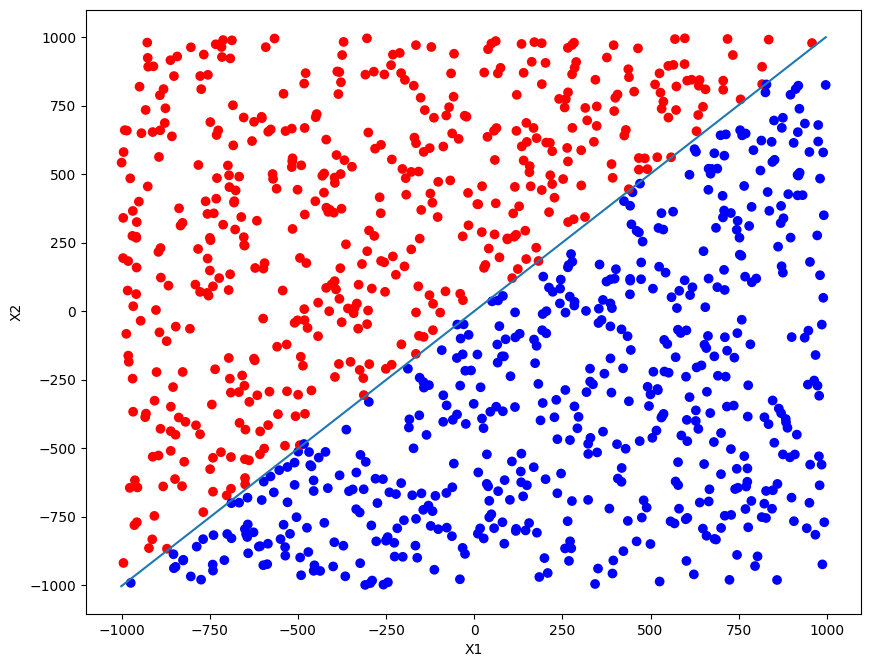

In [82]:
Teste1.grafico()

#Parte 2: Experimentação

In [83]:


experimentacao = []
n = (0.4, 0.1, 0.01) # taxa de aprendizado
I = ([-100, +100], [-0.5, 0.5])
count = 0
for i in range(6):
  experimento = []
  for j in range(10):
    r = Neuronio(data1)
    r.taxa_aprendizado = n[(i%3)]
    r.taxa_inicial = I[(i%2)]
    experimento.append(r) # Add um objeto para cada experimentacao
    count +=1 
    print(f"Rede id: {count} \n"+
    f"n = {r.taxa_aprendizado}\nI={r.taxa_inicial}"+
    "\n\n")
  experimentacao.append(experimento)

Pesos iniciais:
╒═══════════╤═══════════╤════════════╕
│      bias │        x1 │         x2 │
╞═══════════╪═══════════╪════════════╡
│ 0.0815241 │ -0.373845 │ -0.0174936 │
╘═══════════╧═══════════╧════════════╛
Rede id: 1 
n = 0.4
I=[-100, 100]


Pesos iniciais:
╒═══════════╤═══════════╤══════════╕
│      bias │        x1 │       x2 │
╞═══════════╪═══════════╪══════════╡
│ -0.322597 │ -0.439473 │ 0.348754 │
╘═══════════╧═══════════╧══════════╛
Rede id: 2 
n = 0.4
I=[-100, 100]


Pesos iniciais:
╒══════════╤═══════════╤══════════╕
│     bias │        x1 │       x2 │
╞══════════╪═══════════╪══════════╡
│ 0.234821 │ -0.111526 │ -0.10373 │
╘══════════╧═══════════╧══════════╛
Rede id: 3 
n = 0.4
I=[-100, 100]


Pesos iniciais:
╒══════════╤══════════╤═════════╕
│     bias │       x1 │      x2 │
╞══════════╪══════════╪═════════╡
│ 0.359289 │ 0.282217 │ 0.19247 │
╘══════════╧══════════╧═════════╛
Rede id: 4 
n = 0.4
I=[-100, 100]


Pesos iniciais:
╒═══════════╤═══════════╤═════════╕
│      bia

## Treinos

In [84]:
def dp(x, media):
  s = 0

  for Xi in x:
    s+=(Xi - media)**2
  
  n = len(x) 
  va = (s/n) #variância 

  return va**(1/2) #desvio padrao


media_ajustes = []
desvioPadrao = []
minimos = []


for exp in experimentacao:
  
  qtd_ajuste = 0
  conjunto = []
  min_epocas = 0
  print(f"\n\n\n/// Treino para o set de n = {exp[0].taxa_aprendizado} x I ={exp[0].taxa_inicial}///\n\n\n")

  for rede in exp:

    rede.treinamento()
    qtd_ajuste += rede.ajustes
    conjunto.append(rede.ajustes)
    if(min_epocas == 0 or min_epocas > rede.epocas):
      min_ajustes = rede.ajustes

  minimos.append(min_ajustes)
  media_ajustes.append(qtd_ajuste/10) # lista de medias de ajustes, tamanho = 6
  desvioPadrao.append(dp(conjunto, qtd_ajuste/10)) # lista de desvio padrao, tamanho = 6


A saída de streaming foi truncada nas últimas 5000 linhas.
Na época: 5 Houve 137 ajuste(s)
Pesos ajustados:
╒═════════╤═════════╤═════════╕
│    bias │      x1 │      x2 │
╞═════════╪═════════╪═════════╡
│ 34.6131 │ 15.5829 │ 9.92405 │
╘═════════╧═════════╧═════════╛
Na época: 6 Houve 150 ajuste(s)
Pesos ajustados:
╒═════════╤═════════╤═════════╕
│    bias │      x1 │      x2 │
╞═════════╪═════════╪═════════╡
│ 19.6131 │ 30.5638 │ 25.1698 │
╘═════════╧═════════╧═════════╛
Na época: 7 Houve 288 ajuste(s)
Pesos ajustados:
╒═════════╤═════════╤═════════╕
│    bias │      x1 │      x2 │
╞═════════╪═════════╪═════════╡
│ 48.4131 │ 15.4876 │ 11.1581 │
╘═════════╧═════════╧═════════╛
Na época: 8 Houve 150 ajuste(s)
Pesos ajustados:
╒═════════╤═════════╤═════════╕
│    bias │      x1 │      x2 │
╞═════════╪═════════╪═════════╡
│ 33.4131 │ 30.4685 │ 26.4038 │
╘═════════╧═════════╧═════════╛
Na época: 9 Houve 45 ajuste(s)
Pesos ajustados:
╒═════════╤═════════╤═════════╕
│    bias │      x1 │    

# Resultados

### Resultados mostrando os pesos finais

In [85]:
def print_pesos(rede):

  m = np.array([rede.pesos])
  header = ["bias","x1","x2"]
  table = tabulate(m,header,tablefmt="fancy_grid")
  print(table)
  
i = 0
for exp in experimentacao:

  treino = exp[-1]

  taxa_aprendizado = "η = " + str(treino.taxa_aprendizado)
  taxa_inicial = str(treino.taxa_inicial[0])+" ± "+ str(treino.taxa_inicial[1])

  media = media_ajustes[i]
  dp = desvioPadrao[i]
  minimo = minimos[i]
  quantidade_ajustes = str(media) + " ± " + str(dp)
  m = np.array([taxa_aprendizado, taxa_inicial, quantidade_ajustes, minimo])
  m = m.reshape(1,4)
  header = ["Taxa de aprendizado","Intervalo de pesos","Quantidade de ajustes", "Menor numero de épocas para convergência"]
  table = tabulate(m,header,tablefmt="fancy_grid")
  print(table)

  print_pesos(treino)
  
  print("\n\n\n")
  i+=1

╒═══════════════════════╤══════════════════════╤═════════════════════════════╤════════════════════════════════════════════╕
│ Taxa de aprendizado   │ Intervalo de pesos   │ Quantidade de ajustes       │   Menor numero de épocas para convergência │
╞═══════════════════════╪══════════════════════╪═════════════════════════════╪════════════════════════════════════════════╡
│ η = 0.4               │ -100 ± 100           │ 1300.2 ± 270.78803518619503 │                                        797 │
╘═══════════════════════╧══════════════════════╧═════════════════════════════╧════════════════════════════════════════════╛
╒════════╤═════════╤═════════╕
│   bias │      x1 │      x2 │
╞════════╪═════════╪═════════╡
│ 78.967 │ 60.5879 │ 42.5327 │
╘════════╧═════════╧═════════╛




╒═══════════════════════╤══════════════════════╤═════════════════════════════╤════════════════════════════════════════════╕
│ Taxa de aprendizado   │ Intervalo de pesos   │ Quantidade de ajustes       │   Menor numero de 

### Tabela Resultados completa, sem pesos finais

In [86]:
i = 0
dados = []
for exp in experimentacao:

  treino = exp[-1]

  taxa_aprendizado = "η = " + str(treino.taxa_aprendizado)
  taxa_inicial = "("+str(treino.taxa_inicial[0])+" ± "+ str(treino.taxa_inicial[1])+")"
  media = media_ajustes[i]
  dp = round(desvioPadrao[i], 2)
  minimo = minimos[i]
  quantidade_ajustes = str(media) + " ± " + str(dp)

  linha = [taxa_aprendizado+"                   "+taxa_inicial, quantidade_ajustes, minimo]
  dados.append(linha)
  i +=1 

m = np.array(dados[0])
m = m.reshape(1,3)
for i in range(1, len(dados)):
  m = np.append(m, np.array(dados[i]).reshape(1,3), axis= 0)

header = ["             Configurações\nTaxa de aprendizado    Intervalo de Pesos",
          "Quantidade de ajustes", "Menor numero de épocas\npara convergência"]
table = tabulate(m,header,tablefmt="presto")

print(table)


              Configurações                  | Quantidade de ajustes   |   Menor numero de épocas
 Taxa de aprendizado    Intervalo de Pesos   |                         |        para convergência
---------------------------------------------+-------------------------+--------------------------
 η = 0.4                   (-100 ± 100)      | 1300.2 ± 270.79         |                      797
 η = 0.1                   (-0.5 ± 0.5)      | 1665.0 ± 464.99         |                     1510
 η = 0.01                   (-100 ± 100)     | 1314.4 ± 575.83         |                     2278
 η = 0.4                   (-0.5 ± 0.5)      | 1561.1 ± 326.63         |                     1509
 η = 0.1                   (-100 ± 100)      | 1486.1 ± 567.01         |                     1153
 η = 0.01                   (-0.5 ± 0.5)     | 1325.3 ± 492.07         |                     1380


#Graficos

###n x I = 0.4 x  [-100, 100]

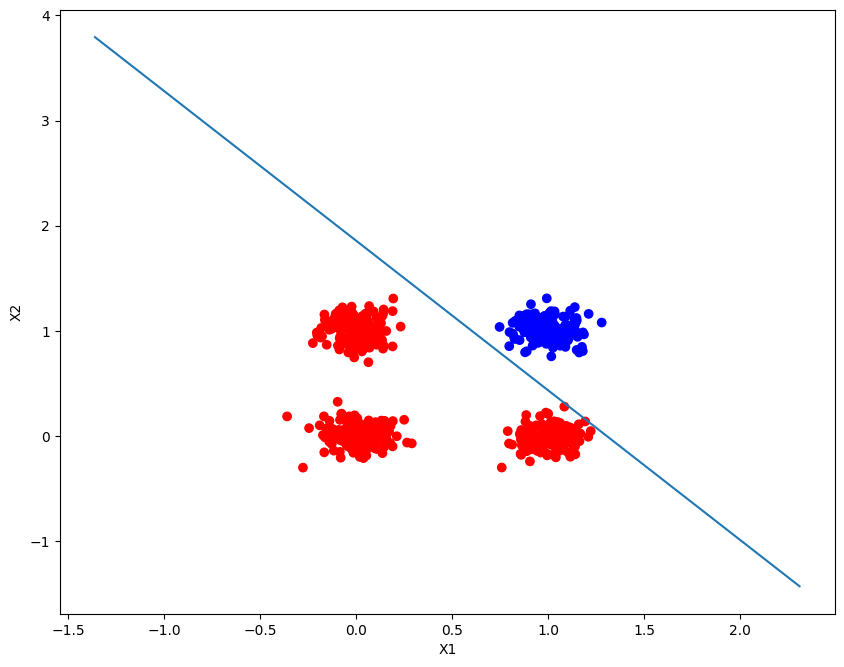

In [87]:
experimentacao[0][-1].grafico()

###n x I = 0.1 X  [-0.5, 0.5]

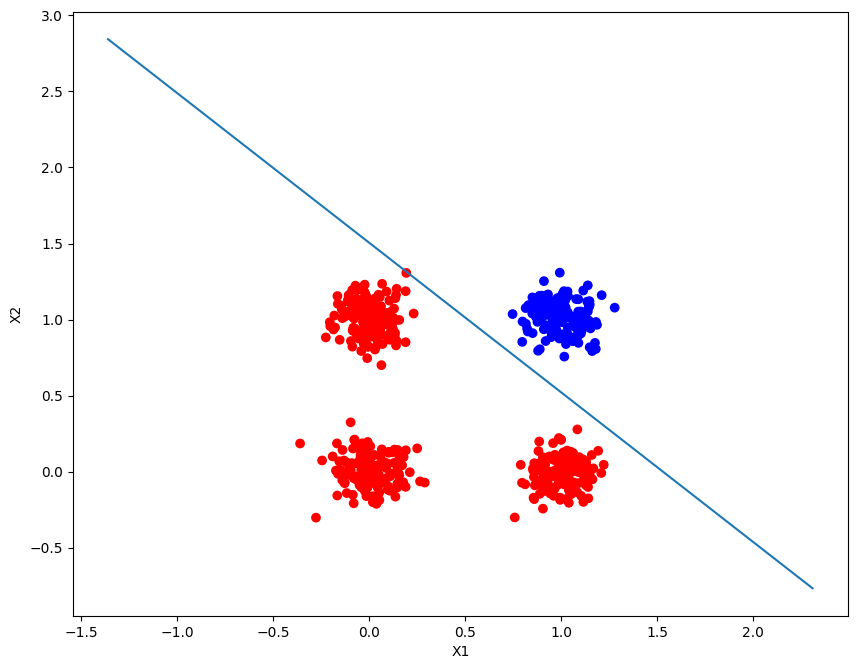

In [88]:
experimentacao[1][-1].grafico()

###n x I =  0.01 X  [-100, 100]

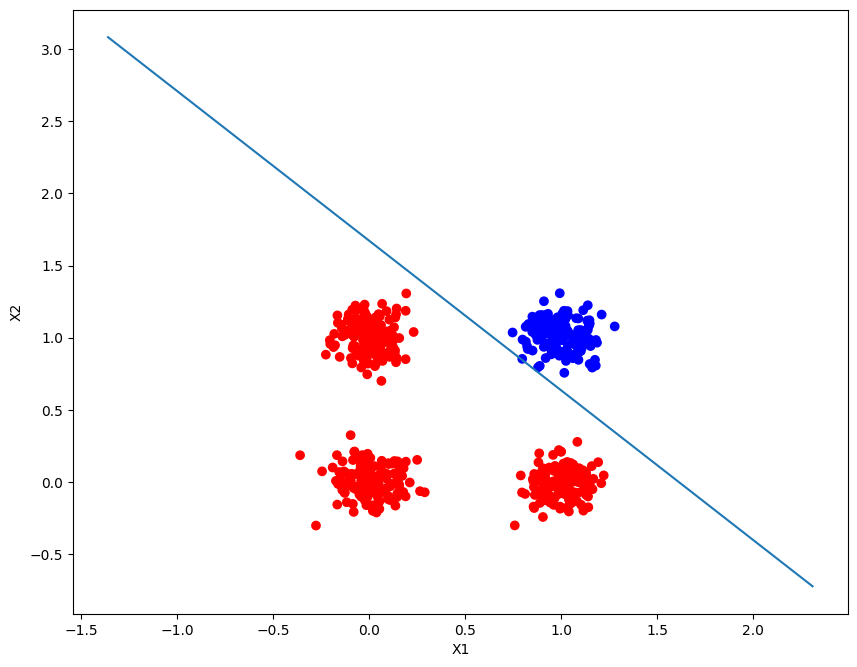

In [89]:
experimentacao[2][-1].grafico()

###n x I = 0.4 x [-0.5, 0.5]


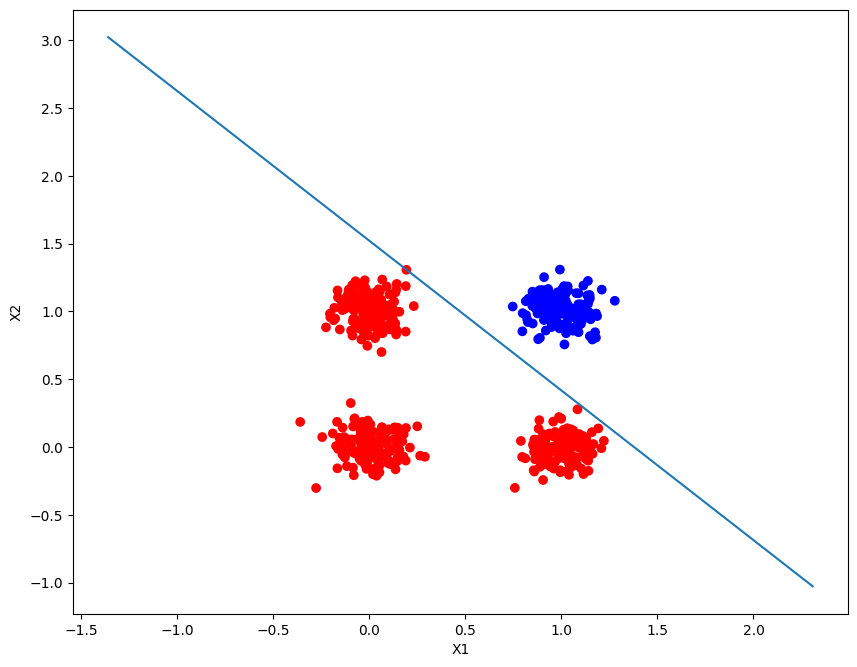

In [90]:
experimentacao[3][-1].grafico()

###n x I = 0.1 x [-100, 100]


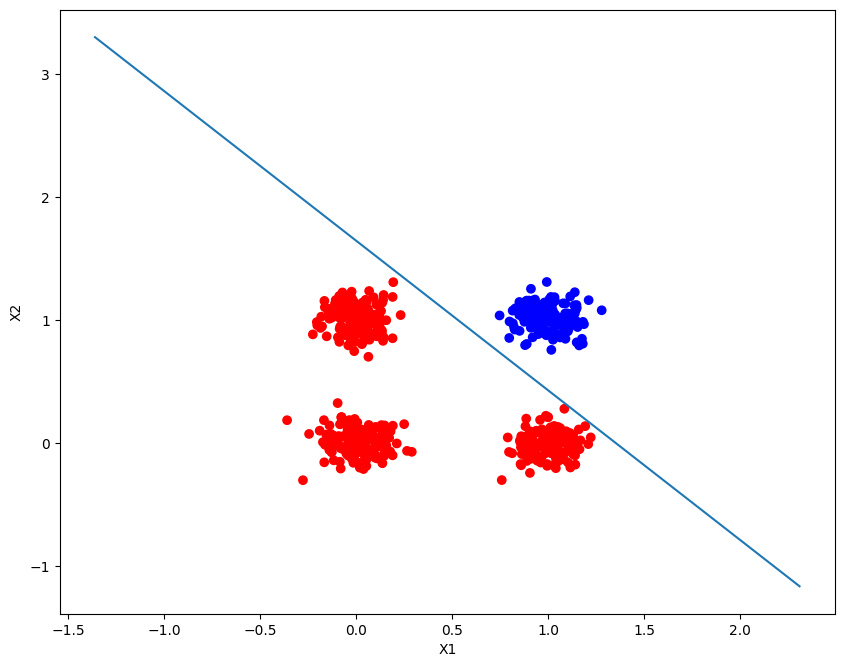

In [91]:
experimentacao[4][-1].grafico()

###n x I = 0.01 x [-0.5, 0.5]


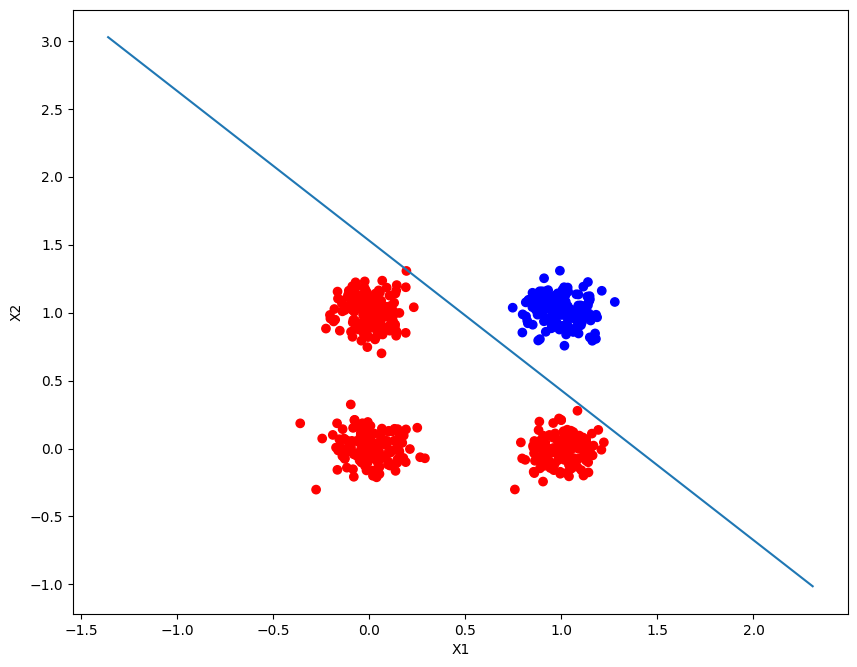

In [92]:
experimentacao[5][-1].grafico()

### Comparação de todos os graficos evidenciando que todos convergiram indepdendente das configurações iniciais

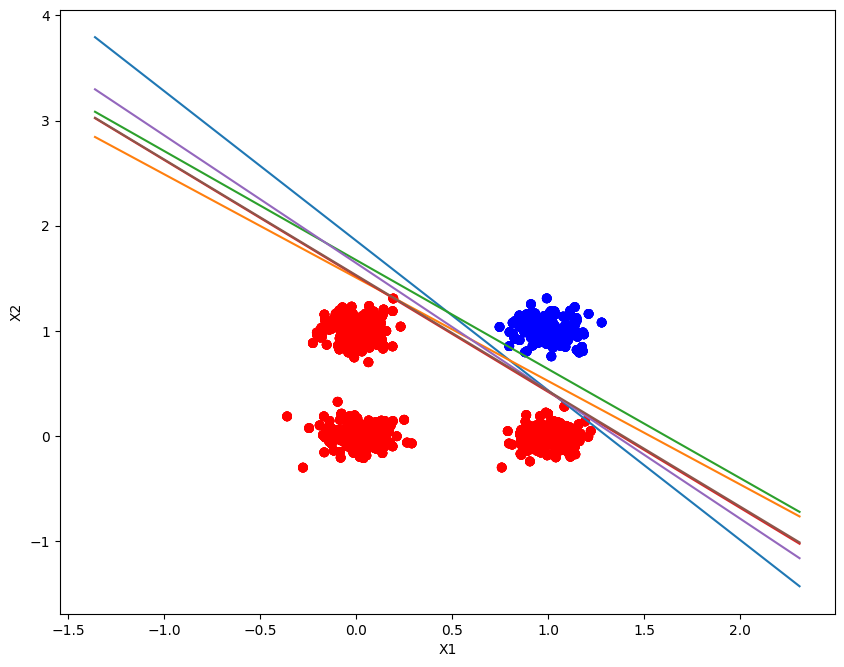

In [93]:
for i in range(6):
  experimentacao[i][-1].grafico()

#Parte 3: Validação Holdout e problema não linearmente separável

##Treinamento e teste:

In [94]:
'''
Embaralhando os dados em função da separação dos dados para o método Holdout
que necessita ser feita de forma aleatória:
'''
np.random.shuffle(array_ho)
#instanciando o neurônio:
Teste2 = Neuronio(array_ho)

Pesos iniciais:
╒═══════════╤═══════════╤══════════╕
│      bias │        x1 │       x2 │
╞═══════════╪═══════════╪══════════╡
│ -0.296108 │ -0.163101 │ 0.238122 │
╘═══════════╧═══════════╧══════════╛


A distribuição do gráfico inicial não está no formato linear, portanto não é linearmente separável

In [95]:
array_ho1 = [i[2] for i in array_ho]

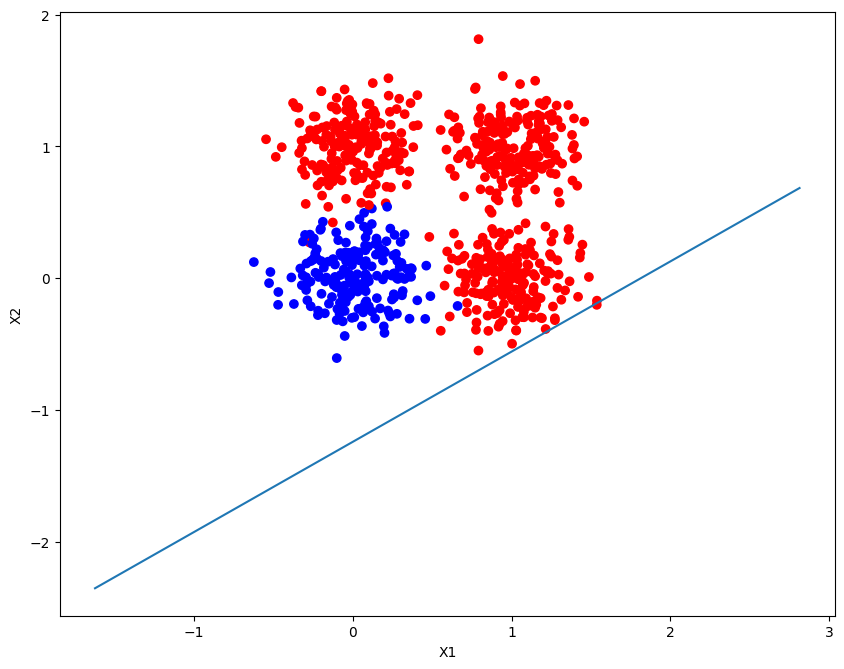

In [96]:
Teste2.grafico(coordenadas=array_ho, cores=array_ho1)

In [97]:
Teste2.treinamento_holdout()

Na época: 1 Houve 425 ajuste(s)
Pesos ajustados:
╒═════════╤══════════╤═════════╕
│    bias │       x1 │      x2 │
╞═════════╪══════════╪═════════╡
│ 42.2039 │ -28.3319 │ -28.071 │
╘═════════╧══════════╧═════════╛
Na época: 2 Houve 134 ajuste(s)
Pesos ajustados:
╒═════════╤══════════╤══════════╕
│    bias │       x1 │       x2 │
╞═════════╪══════════╪══════════╡
│ 28.8039 │ -28.0591 │ -27.7592 │
╘═════════╧══════════╧══════════╛
Na época: 3 Houve 134 ajuste(s)
Pesos ajustados:
╒═════════╤══════════╤══════════╕
│    bias │       x1 │       x2 │
╞═════════╪══════════╪══════════╡
│ 15.4039 │ -27.7863 │ -27.4475 │
╘═════════╧══════════╧══════════╛
Na época: 4 Houve 131 ajuste(s)
Pesos ajustados:
╒═════════╤══════════╤══════════╕
│    bias │       x1 │       x2 │
╞═════════╪══════════╪══════════╡
│ 2.30389 │ -27.4039 │ -27.0605 │
╘═════════╧══════════╧══════════╛
Na época: 5 Houve 89 ajuste(s)
Pesos ajustados:
╒══════════╤══════════╤══════════╕
│     bias │       x1 │       x2 │
╞══════════

In [98]:
#Resultados verdadeiros do conjunto teste:
Teste2.resultados_esperados_teste

array([1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0.

In [99]:
#Resultados previstos do conjunto teste:
Teste2.teste_holdout()

array([1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0.

##Metricas:

###**1.** Matriz confusão

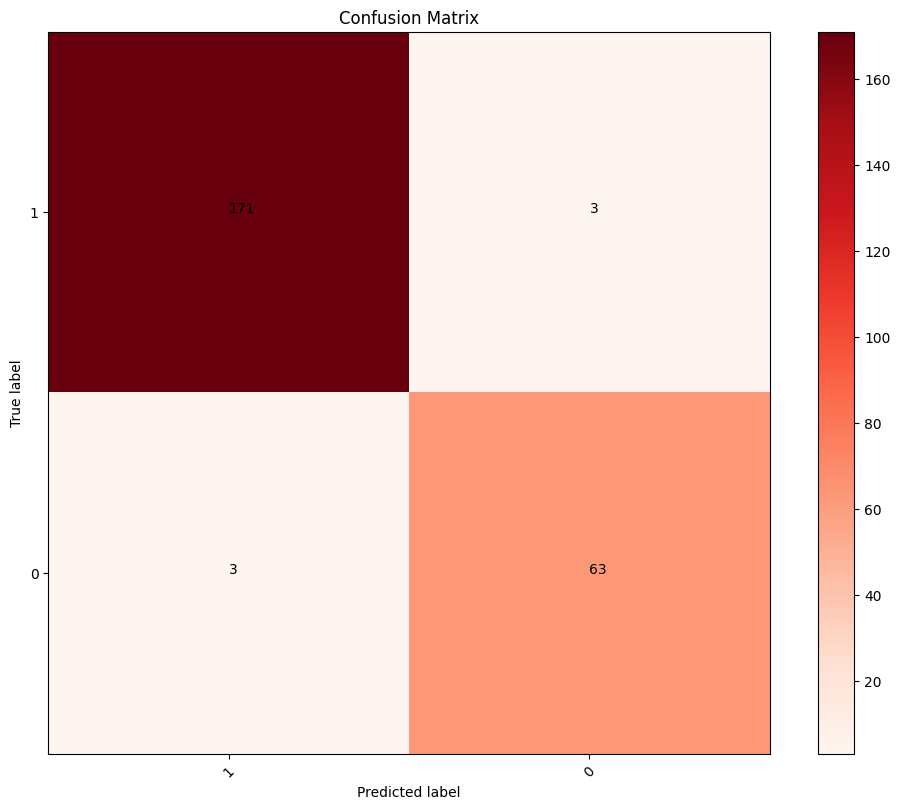

In [100]:
cm = confusion_matrix(Teste2.resultados_esperados_teste, Teste2.resultados_algoritmo_teste)
cmap=plt.cm.Reds
normalize = False
classes =  [1,0]
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt))

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Métricas gerais:

In [101]:
print("----------- classification report ------------\n\n",classification_report(Teste2.resultados_esperados_teste, Teste2.teste_holdout()))
print("----------- confusion matrix ------------\n\n",confusion_matrix(Teste2.resultados_esperados_teste, Teste2.resultados_algoritmo_teste))

precision=precision_score(Teste2.resultados_esperados_teste, Teste2.teste_holdout())
recall=recall_score(Teste2.resultados_esperados_teste, Teste2.teste_holdout())
f1=f1_score(Teste2.resultados_esperados_teste, Teste2.teste_holdout())
accuracy=accuracy_score(Teste2.resultados_esperados_teste, Teste2.teste_holdout())

----------- classification report ------------

               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       174
         1.0       0.95      0.95      0.95        66

    accuracy                           0.97       240
   macro avg       0.97      0.97      0.97       240
weighted avg       0.97      0.97      0.97       240

----------- confusion matrix ------------

 [[171   3]
 [  3  63]]


###**2.** Acurácia

In [102]:
accuracy_score(Teste2.resultados_esperados_teste, Teste2.teste_holdout())

0.975

### **3.**


In [103]:
#Precisão  
precision_score(Teste2.resultados_esperados_teste, Teste2.teste_holdout())

0.9545454545454546

In [104]:
#Revocação
recall_score(Teste2.resultados_esperados_teste, Teste2.teste_holdout())

0.9545454545454546

In [105]:
#F1 Score
f1_score(Teste2.resultados_esperados_teste, Teste2.teste_holdout())

0.9545454545454546

##**4.**

**A partir dessas métricas, podemos perceber que o neurônio não conseguiu prever corretamente os dados utilizando o método Holdout.**
**Um dos principais motivos é do problema não ser linearmente separável, como evidenciado no gráfico (x), isso dificulta a previsão pois não terá uma solução satisfatória para um modelo que tenta dividir os dados linearmente.**

**Também temos a questão da acurácia, mesmo com o problema da não linearidade, estar muito baixa. Esse problema provavelmente se dá ao número baixo de épocas determinado que não deu tempo para o modelo se ajustar adequadamente.** 

## Gráfico com os Dados do Treinamento

In [108]:
aux1 = Teste2.exemplos_treinamento
aux2 = [i[2] for i in aux1]

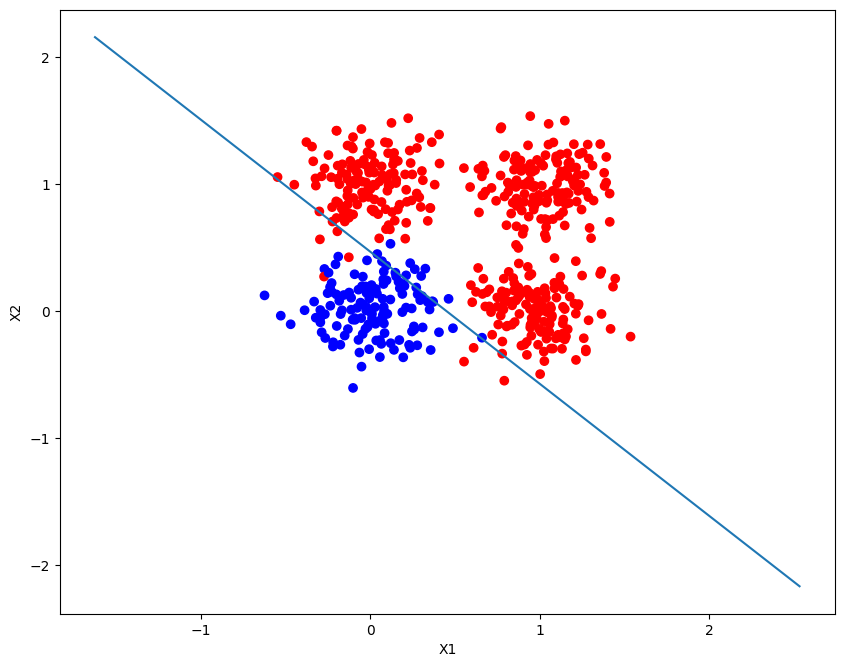

In [109]:
Teste2.grafico(coordenadas=aux1, cores=aux2)

## Gráfico com os Dados do Teste

In [110]:
array_dados_teste=Teste2.exemplos_teste.copy()
resultados=Teste2.teste_holdout().copy()

#criando um conjunto de dados com os resultados do algoritmo
for i in range(len(array_dados_teste)):
  array_dados_teste[i][-1]=resultados[i]
aux1 = Teste2.exemplos_teste
aux2 = [i[2] for i in aux1]

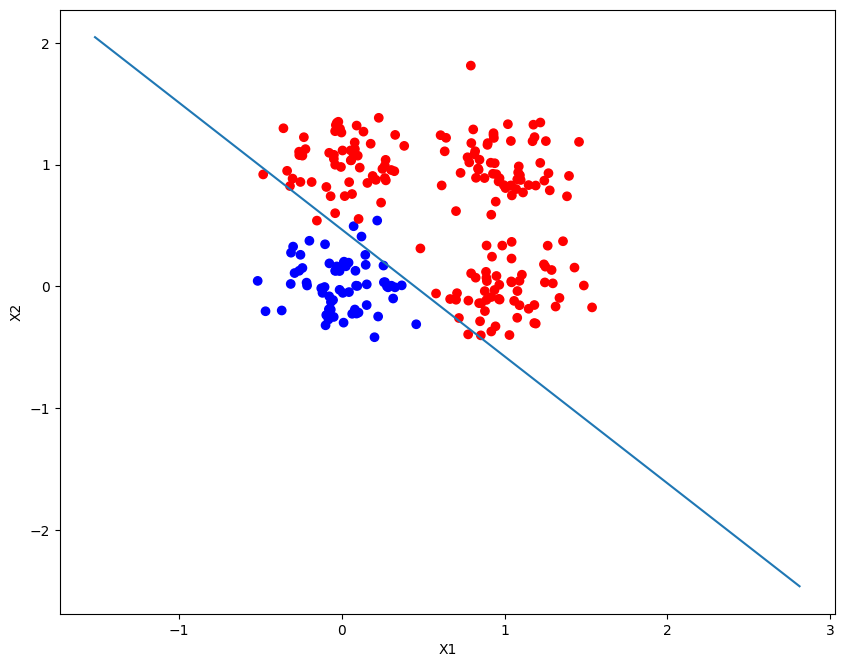

In [111]:
Teste2.grafico(coordenadas=aux1, cores=aux2)